In [ ]:
!pip install fastai

In [ ]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [ ]:
x  = '/content/drive/MyDrive/dataset/test'
path = Path(x)
path.ls()

[PosixPath('/content/drive/MyDrive/dataset/test/AMERICAN REDSTART'),
 PosixPath('/content/drive/MyDrive/dataset/test/BALI STARLING'),
 PosixPath('/content/drive/MyDrive/dataset/test/ASIAN CRESTED IBIS'),
 PosixPath('/content/drive/MyDrive/dataset/test/ARARIPE MANAKIN'),
 PosixPath('/content/drive/MyDrive/dataset/test/BANANAQUIT'),
 PosixPath('/content/drive/MyDrive/dataset/test/ANTBIRD'),
 PosixPath('/content/drive/MyDrive/dataset/test/BALTIMORE ORIOLE'),
 PosixPath('/content/drive/MyDrive/dataset/test/BALD EAGLE'),
 PosixPath('/content/drive/MyDrive/dataset/test/ANHINGA'),
 PosixPath('/content/drive/MyDrive/dataset/test/ANNAS HUMMINGBIRD'),
 PosixPath('/content/drive/MyDrive/dataset/test/AMERICAN AVOCET'),
 PosixPath('/content/drive/MyDrive/dataset/test/AFRICAN CROWNED CRANE'),
 PosixPath('/content/drive/MyDrive/dataset/test/AMERICAN PIPIT'),
 PosixPath('/content/drive/MyDrive/dataset/test/ALEXANDRINE PARAKEET'),
 PosixPath('/content/drive/MyDrive/dataset/test/AFRICAN FIREFINCH'),
 Po

In [ ]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


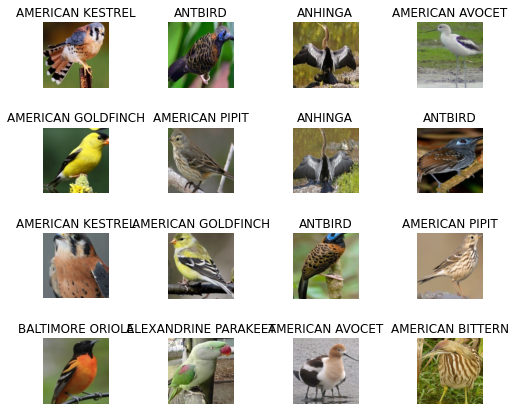

In [ ]:
data.show_batch(rows=4, figsize=(7,6),recompute_scale_factor=True)

In [ ]:
data

ImageDataBunch;

Train: LabelList (80 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
AMERICAN REDSTART,AMERICAN REDSTART,AMERICAN REDSTART,AMERICAN REDSTART,BALI STARLING
Path: /content/drive/MyDrive/dataset/test;

Valid: LabelList (20 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
AMERICAN KESTREL,AMERICAN KESTREL,AMERICAN PIPIT,ARARIPE MANAKIN,BALD EAGLE
Path: /content/drive/MyDrive/dataset/test;

Test: None

In [ ]:
print(data.classes)
len(data.classes)
data.c

['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BALD EAGLE', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT']


20

In [ ]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


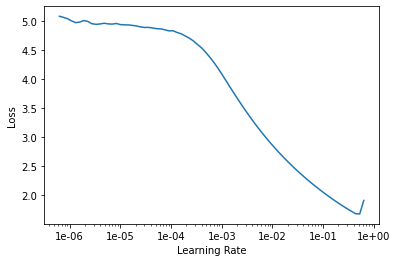

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestions=True)

In [ ]:
resnet18.summary()

NameError: ignored

In [ ]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(40,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,4.872079,5.542207,0.250000,00:04
1,3.073155,2.716382,0.450000,00:01
2,2.181967,1.461537,0.750000,00:01
3,1.639131,0.849531,0.750000,00:01
4,1.304848,0.512864,0.900000,00:01
5,1.076758,0.435930,0.900000,00:01
6,0.914279,0.423120,0.950000,00:01
7,0.792732,0.437222,0.950000,00:01
8,0.707566,0.500749,0.900000,00:01
9,0.630565,0.729904,0.850000,00:01


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.017828,0.309172,0.900000,00:01
1,0.038136,0.212757,0.900000,00:01
2,0.025185,0.107202,0.950000,00:01
3,0.018938,0.066271,0.950000,00:01
4,0.031420,0.475591,0.950000,00:01
5,0.044272,1.024194,0.900000,00:01
6,0.050288,3.225550,0.750000,00:01
7,0.044221,8.343431,0.550000,00:01
8,0.045414,12.884295,0.600000,00:01
9,0.040465,15.604935,0.450000,00:01


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


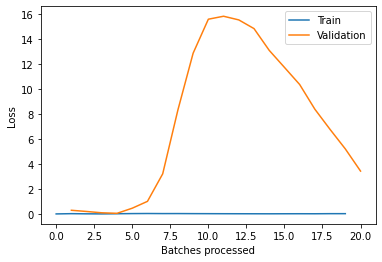

In [ ]:
learn.recorder.plot_losses()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


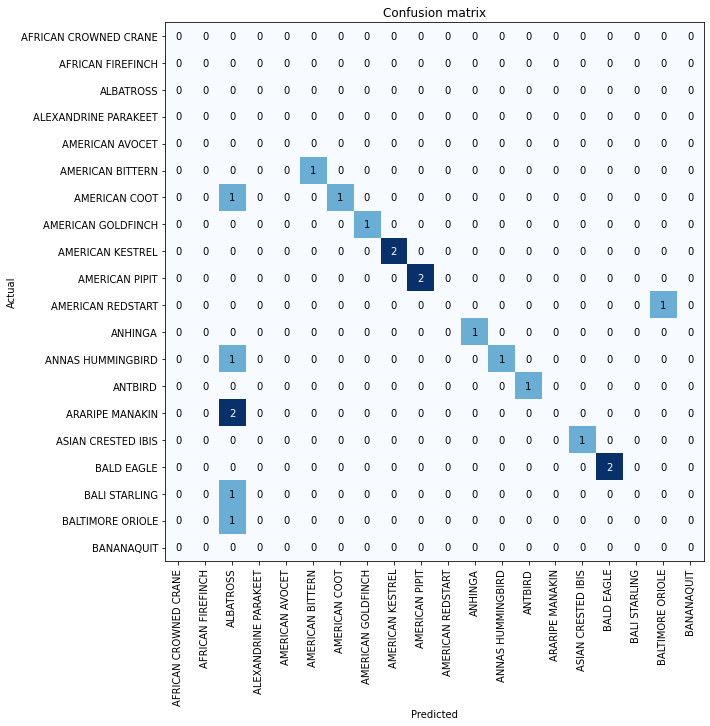

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

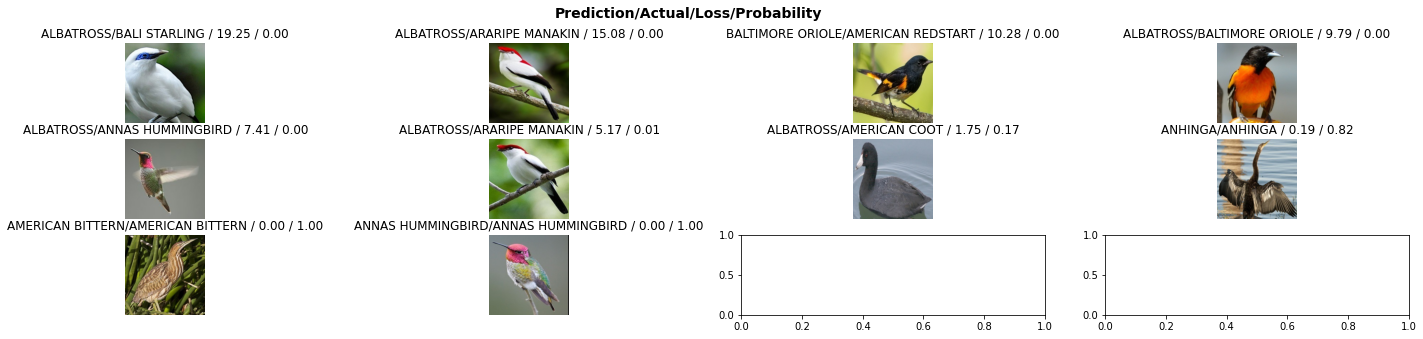

In [ ]:
interp.plot_top_losses(10,figsize = (25,5))

In [ ]:
img = open_image('/content/drive/MyDrive/dataset/test/AMERICAN PIPIT/3.jpg')
print(learn.predict(img)[0])

AMERICAN PIPIT


In [ ]:
img = open_image('/content/drive/MyDrive/dataset/test/AMERICAN PIPIT/3.jpg')
print(learn.predict(img)[0])

AMERICAN PIPIT


In [ ]:
learn.export(file = Path("/kaggle/working/export.pkl"))
learn.model_dir = "/kaggle/working"
learn.save("stage-1",return_path=True)

PosixPath('/kaggle/working/stage-1.pth')